## 환경 설정

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import sys

#경고창이 뜨지 않도록 해주는 것
import warnings
warnings.filterwarnings('ignore')

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
%matplotlib inline 

# 데이터 불러오기 
- 데이터가 크다보니 속도가 오래걸리기도 합니다..!
- 아직 이런 문제를 해결하는 방법에 대한 에듀세션을 배우지 않았으니,
- 각자의 컴퓨터가 감당할 수 있는 만큼, 그리고 지금껏 에듀세션에서 배운 내용으로 최대한 성능개선을 해보시되, 
- 절대적인 accuracy 수치에 대해 부담은 갖지 않으셔도 됩니다! 몇 %라도 개선되었다면 좋습니다 ㅎㅎ

In [ ]:
# 데이터 불러오기 
df = pd.read_csv('NYC_taxi') # 파일경로 알맞게 지정해주세요 


# 여기 아래 부분 꼭 실행시켜주세요! 
df['pickup_hour'] = pd.to_datetime(df['pickup_hour'])


### 모델링할 때 램이 자꾸 터진다면... row 수, 즉 날짜를 줄이거나 특정 지역의 정보만 선택해서 넣으세요! 
## 날짜 줄이기 
#df = df.iloc[0:7000, :] #7000개만 남기기 
##지역 수 줄이기 
# zip_code_list = ['10001', '10002', '10115', '10026', '10027', '10029', '10030', '11797', '11801'] # 더 많은 지역을 포함해도 됩니다! 컴퓨터가 버틸 수 있을 만큼만..! 
# df = df[df.zip_code.isin(zip_code_list)]
# df = df.reset_index()
# df = df.drop(['index'], axis = 1)

In [ ]:
 df

,zip_code,pickup_hour,month,day,weekday,hour,is_weekend,cnt
0,11106,2015-01-01 00:00:00,1,1,3,0,0,75
1,10006,2015-01-01 00:00:00,1,1,3,0,0,64
2,11201,2015-01-01 00:00:00,1,1,3,0,0,169
3,11430,2015-01-01 00:00:00,1,1,3,0,0,222
4,10032,2015-01-01 00:00:00,1,1,3,0,0,64
...,...,...,...,...,...,...,...,...
87015,11219,2015-01-31 23:00:00,1,31,5,23,1,1
87016,10456,2015-01-31 23:00:00,1,31,5,23,1,3
87017,11355,2015-01-31 23:00:00,1,31,5,23,1,1
87018,11210,2015-01-31 23:00:00,1,31,5,23,1,1


# 데이터 전처리

### 모델링을 위한 기본 전처리
  - `기본 정보 확인 (결측치 및 이상치 처리)`
      - df.info()
      - df.describe()
      - 간단한 시각화 
  - `시간 관련 전처리 (새로운 열 생성)` 
      - DATETIME에서 MONTH, HOUR, WEEKDAY 등 추출
  - `Categorical 데이터 전처리`
      - One Hot Encoding
      - Label Encoding
  - `Train / Test Split`
    - NY taxi data에서 주의점 

### 기본 정보 확인 (결측치 및 이상치 처리) 
  - df.info()
  - df.describe()
  - 간단한 시각화 



---


EDA 과정에서 기본적으로 다 확인하셨죠? ㅎㅎ 
EDA 결과 중 모델링에 적용하기로한 부분이 있다면 반영해주세요~!

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87020 entries, 0 to 87019
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   zip_code     87020 non-null  int64         
 1   pickup_hour  87020 non-null  datetime64[ns]
 2   month        87020 non-null  int64         
 3   day          87020 non-null  int64         
 4   weekday      87020 non-null  int64         
 5   hour         87020 non-null  int64         
 6   is_weekend   87020 non-null  int64         
 7   cnt          87020 non-null  int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 5.3 MB


결측치 없음

In [ ]:
df.describe()

,zip_code,month,day,weekday,hour,is_weekend,cnt
count,87020.000000,87020.0,87020.000000,87020.000000,87020.000000,87020.000000,87020.000000
mean,10567.760296,1.0,15.871685,3.169593,11.580648,0.303838,141.603080
std,579.688987,0.0,8.951484,1.936788,6.973099,0.459916,306.902683
min,10001.000000,1.0,1.000000,0.000000,0.000000,0.000000,1.000000
25%,10032.000000,1.0,8.000000,2.000000,6.000000,0.000000,2.000000
50%,10177.000000,1.0,16.000000,3.000000,12.000000,0.000000,12.000000
75%,11217.000000,1.0,24.000000,5.000000,18.000000,1.000000,80.000000
max,14801.000000,1.0,31.000000,6.000000,23.000000,1.000000,2657.000000


month는 모두 1이므로 의미 없는 column
is_weekend의 정보는 weekday에 포함되었다고 판단하여 제거
day 정보 역시 의미가 없다고 판단하여 제거
pickup_hour의 정보 역시 다른 행에 모두 포함되어 있으므로 제거

In [ ]:
df_revised = df.drop(['pickup_hour', 'month', 'is_weekend'], axis=1)

In [ ]:
df_revised['weekhour'] = df_revised.weekday * 24 + df_revised.hour

df_revised.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87020 entries, 0 to 87019
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   zip_code  87020 non-null  int64
 1   day       87020 non-null  int64
 2   weekday   87020 non-null  int64
 3   hour      87020 non-null  int64
 4   cnt       87020 non-null  int64
 5   weekhour  87020 non-null  int64
dtypes: int64(6)
memory usage: 4.0 MB


In [ ]:
df_revised.head()

,zip_code,day,weekday,hour,cnt,weekhour
0,11106,1,3,0,75,72
1,10006,1,3,0,64,72
2,11201,1,3,0,169,72
3,11430,1,3,0,222,72
4,10032,1,3,0,64,72


**zip-code 상위 25개만 남기기**

In [ ]:
df2 = df.groupby(['zip_code'])['cnt'].sum().to_frame()
df2.reset_index(inplace=True)
df2['zip_code'] = df2['zip_code'].astype(str)
df2['cnt'] = df2['cnt']/31
df2.rename(columns={'cnt':'avg_cnt'}, inplace=True)
df2.sort_values(by='avg_cnt', axis=0, ascending=False, inplace=True)
df2 = df2.reset_index().drop('index',axis=1)

In [ ]:
i = 25

In [ ]:
df_revised['zip_code'] = df_revised['zip_code'].astype(str)

In [ ]:
top_zip_code = df2['zip_code'][:i]
df_revised = pd.merge(df_revised, top_zip_code, how='inner')

In [ ]:
df_revised

,zip_code,day,weekday,hour,cnt,weekhour
0,11430,1,3,0,222,72
1,11430,1,3,1,119,73
2,11430,1,3,2,10,74
3,11430,1,3,3,22,75
4,11430,1,3,4,25,76
...,...,...,...,...,...,...
18506,10003,31,5,19,2177,139
18507,10003,31,5,20,2114,140
18508,10003,31,5,21,2326,141
18509,10003,31,5,22,2441,142


In [ ]:
df_revised['zip_code'] = df_revised['zip_code'].astype(int)

**pairplot**

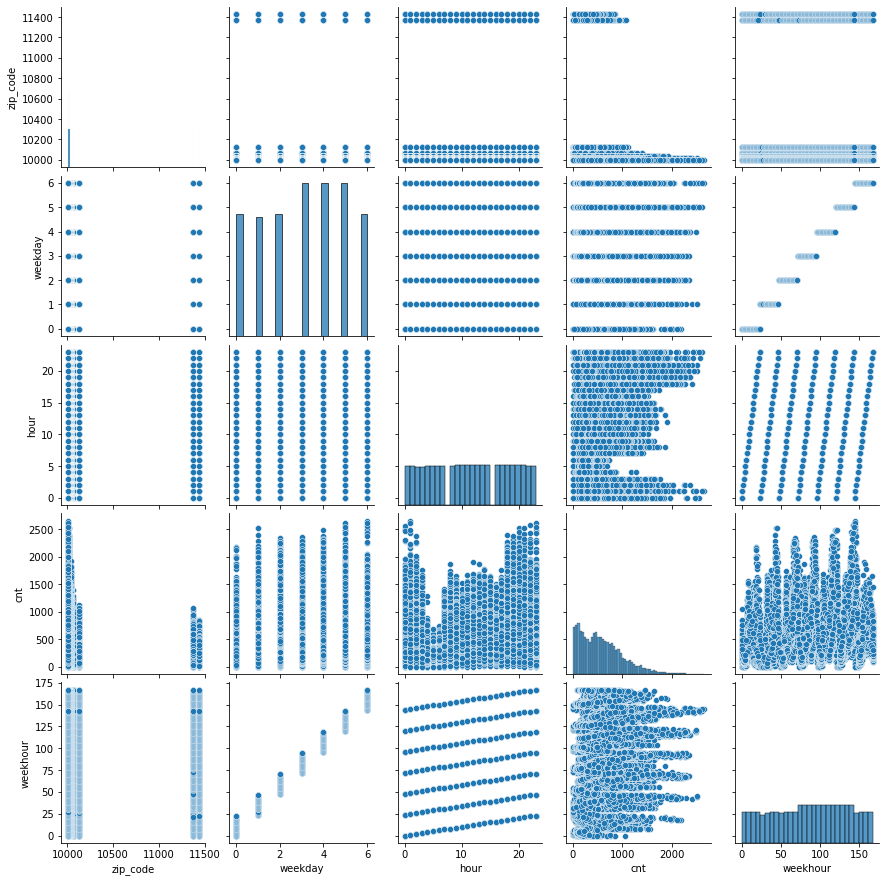

In [ ]:
sns.pairplot(df_revised.drop(['day'], axis=1), diag_kind='hist');

### Train and Test Split
- 시계열 데이터는 Random Sampling을 하면 안됨
- Train엔 과거 데이터, Test엔 (과거 대비) 미래 데이터가 있어야 함
    - 만약 Train에 미래 데이터가 있다면? 미래를 보고 과거를 예측한 꼴
    - 실제로 사용할 땐 과거 데이터 기반으로 미래 데이터를 예측

In [ ]:
def split_train_and_test(df, day):
    """
    Dataframe에서 train_df, test_df로 나눠주는 함수
    
    df : 시계열 데이터 프레임
    date : 기준점 일
    """
    train_df = df[df['day'] < day]
    test_df = df[df['day'] >= day]
    return train_df, test_df

- 위 방법은 명시적으로 date를 지정하는 방법이 마음에 들지 않을수도 있음
    - 이럴 경우 Dataframe의 시간 데이터를 마지막 1주치만 Test로 지정할 수 있음

In [ ]:
def split_train_and_test_period(df, period):
    """
    Dataframe에서 train_df, test_df로 나눠주는 함수
    
    df : 시계열 데이터 프레임
    period : train/test 기준 일
    """
    criteria = max(df['day']) - period
    train_df = df[df['day'] < criteria]
    test_df = df[df['day'] >= criteria]
    return train_df, test_df

### Train / Test 나누기

In [ ]:
df_revised

,zip_code,day,weekday,hour,cnt,weekhour
0,11430,1,3,0,222,72
1,11430,1,3,1,119,73
2,11430,1,3,2,10,74
3,11430,1,3,3,22,75
4,11430,1,3,4,25,76
...,...,...,...,...,...,...
18506,10003,31,5,19,2177,139
18507,10003,31,5,20,2114,140
18508,10003,31,5,21,2326,141
18509,10003,31,5,22,2441,142


In [ ]:
df_revised = df_revised[(df_revised['day']!=26) & (df_revised['day']!=27)]

In [ ]:
train_df, test_df = split_train_and_test(df_revised, 24)

In [ ]:
train_df.head()

,zip_code,day,weekday,hour,cnt,weekhour
0,11430,1,3,0,222,72
1,11430,1,3,1,119,73
2,11430,1,3,2,10,74
3,11430,1,3,3,22,75
4,11430,1,3,4,25,76


In [ ]:
test_df.head()

,zip_code,day,weekday,hour,cnt,weekhour
552,11430,24,5,0,306,120
553,11430,24,5,1,63,121
554,11430,24,5,2,11,122
555,11430,24,5,3,18,123
556,11430,24,5,4,15,124


In [ ]:
train_df.zip_code = train_df.zip_code.astype(str)
train_df.weekday = train_df.weekday.astype(str)
train_df.hour = train_df.hour.astype(str)
train_df = train_df.drop(['day'], axis=1)

test_df.zip_code = test_df.zip_code.astype(str)
test_df.weekday = test_df.weekday.astype(str)
test_df.hour = test_df.hour.astype(str)
test_df = test_df.drop(['day'], axis=1)

In [ ]:
y_train = train_df.pop('cnt')
x_train = train_df.copy()

In [ ]:
y_test = test_df.pop('cnt')
x_test = test_df.copy()

In [ ]:
x_train

,zip_code,weekday,hour,weekhour
0,11430,3,0,72
1,11430,3,1,73
2,11430,3,2,74
3,11430,3,3,75
4,11430,3,4,76
...,...,...,...,...
18316,10003,4,19,115
18317,10003,4,20,116
18318,10003,4,21,117
18319,10003,4,22,118


In [ ]:
y_train

0         222
1         119
2          10
3          22
4          25
         ... 
18316    1833
18317    1800
18318    1923
18319    2090
18320    2310
Name: cnt, Length: 13784, dtype: int64

In [ ]:
x_test

,zip_code,weekday,hour,weekhour
552,11430,5,0,120
553,11430,5,1,121
554,11430,5,2,122
555,11430,5,3,123
556,11430,5,4,124
...,...,...,...,...
18506,10003,5,19,139
18507,10003,5,20,140
18508,10003,5,21,141
18509,10003,5,22,142


In [ ]:
y_test

552       306
553        63
554        11
555        18
556        15
         ... 
18506    2177
18507    2114
18508    2326
18509    2441
18510    2543
Name: cnt, Length: 3590, dtype: int64

# 모델링

## Decision Tree with Grid Search & K-Fold

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

param_grid = {
    'max_depth': range(1, 30),
    'criterion' : ['squared_error', 'mse', 'poisson']
}

dt = DecisionTreeRegressor()

kf = KFold(n_splits=5,
           shuffle=True,
          )

grid_search = GridSearchCV(estimator=dt, 
                           param_grid=param_grid, 
                           cv=kf, 
                          )

grid_search.fit(x_train, y_train)

grid_search.best_params_

{'criterion': 'mse', 'max_depth': 13}

In [ ]:
grid_search.score(x_test, y_test)

0.9257366326884034

In [ ]:
dt = DecisionTreeRegressor(max_depth = grid_search.best_params_['max_depth'],
                           criterion = grid_search.best_params_['criterion'])
dt.fit(x_train, y_train)
dt.score(x_test, y_test)

0.9257366326884034

In [ ]:
prediction_dt = dt.predict(x_test)

In [ ]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score

print('training_r2_score: {}\n'.format(dt.score(x_train, y_train)))
print('<test_set_score>')
print('explained_variance_score: {}'.format(explained_variance_score(y_test,prediction_dt)))
print('mean_absolute_errors: {}'.format(mean_absolute_error(y_test, prediction_dt)))
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, prediction_dt)))
print('r2_score: {}'.format(r2_score(y_test, prediction_dt)))

training_r2_score: 0.8892055232095676

<test_set_score>
explained_variance_score: 0.9270586987607242
mean_absolute_errors: 85.03802577813333
mean_squared_errors: 14981.61310222926
r2_score: 0.9257366326884034


In [ ]:
fi = dt.feature_importances_

print('zip_code : {}'.format(fi[0]))
print('weekday : {}'.format(fi[1]))
print('hour : {}'.format(fi[2]))
print('weekday * hour : {}'.format(fi[3]))

zip_code : 0.48339797377934035
weekday : 0.02173375020507144
hour : 0.4133735984732304
weekday * hour : 0.08149467754235767


In [ ]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(dt, out_file=None, 
                feature_names = x_train.columns,
                class_names = 'cnt',
                max_depth = 3, # 표현하고 싶은 최대 depth
                precision = 3, # 소수점 표기 자릿수
                filled = True, # class별 color 채우기
                rounded=True, # 박스의 모양을 둥글게
               )

graph = graphviz.Source(dot_data)

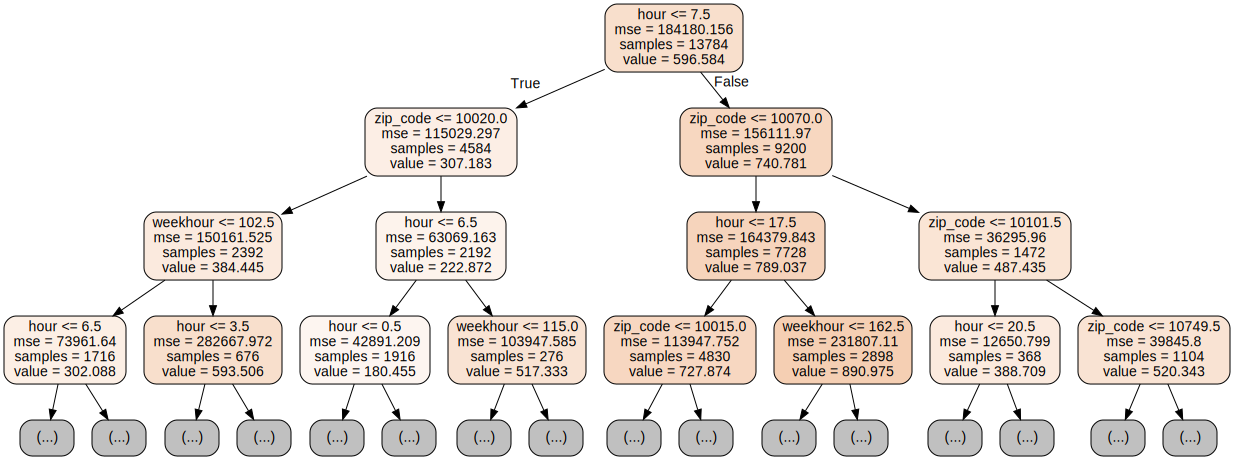

In [ ]:
graph

In [ ]:
with open('no_ohe.svg', 'w') as f:
    f.write(graph._repr_svg_())

## One Hot Encoding

In [ ]:
df_revised = df.drop(['pickup_hour', 'month', 'is_weekend'], axis=1)

In [ ]:
df_revised['weekhour'] = df_revised.weekday * 24 + df_revised.hour

df_revised.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87020 entries, 0 to 87019
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   zip_code  87020 non-null  int64
 1   day       87020 non-null  int64
 2   weekday   87020 non-null  int64
 3   hour      87020 non-null  int64
 4   cnt       87020 non-null  int64
 5   weekhour  87020 non-null  int64
dtypes: int64(6)
memory usage: 4.0 MB


In [ ]:
df_revised.head()

,zip_code,day,weekday,hour,cnt,weekhour
0,11106,1,3,0,75,72
1,10006,1,3,0,64,72
2,11201,1,3,0,169,72
3,11430,1,3,0,222,72
4,10032,1,3,0,64,72


In [ ]:
i = 25

In [ ]:
df_revised['zip_code'] = df_revised['zip_code'].astype(str)

In [ ]:
top_zip_code = df2['zip_code'][:i]
df_revised = pd.merge(df_revised, top_zip_code, how='inner')

In [ ]:
df_revised

,zip_code,day,weekday,hour,cnt,weekhour
0,11430,1,3,0,222,72
1,11430,1,3,1,119,73
2,11430,1,3,2,10,74
3,11430,1,3,3,22,75
4,11430,1,3,4,25,76
...,...,...,...,...,...,...
18506,10003,31,5,19,2177,139
18507,10003,31,5,20,2114,140
18508,10003,31,5,21,2326,141
18509,10003,31,5,22,2441,142


In [ ]:
df_revised.zip_code = df_revised.zip_code.astype(str)
df_revised.weekday = df_revised.weekday.astype(str)
df_revised.hour = df_revised.hour.astype(str)
df_revised.weekhour = df_revised.weekhour.astype(str)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df_revised[['zip_code']])

OneHotEncoder(handle_unknown='ignore')

In [ ]:
ohe_output = enc.transform(df_revised[['zip_code']]).toarray()
oh_feature_df1 = pd.concat([df_revised, pd.DataFrame(ohe_output, columns='zip_code_'+ enc.categories_[0])], axis=1)

In [ ]:
enc.fit(oh_feature_df1[['weekday']])

OneHotEncoder(handle_unknown='ignore')

In [ ]:
ohe_output = enc.transform(oh_feature_df1[['weekday']]).toarray()
oh_feature_df2 = pd.concat([oh_feature_df1, pd.DataFrame(ohe_output, columns='weekday_'+ enc.categories_[0])], axis=1)

In [ ]:
enc.fit(oh_feature_df2[['hour']])

OneHotEncoder(handle_unknown='ignore')

In [ ]:
ohe_output = enc.transform(oh_feature_df2[['hour']]).toarray()
oh_feature_df3 = pd.concat([oh_feature_df2, pd.DataFrame(ohe_output, columns='hour_'+ enc.categories_[0])], axis=1)

In [ ]:
enc.fit(oh_feature_df3[['weekhour']])

OneHotEncoder(handle_unknown='ignore')

In [ ]:
ohe_output = enc.transform(oh_feature_df3[['weekhour']]).toarray()
df_revised = pd.concat([oh_feature_df3, pd.DataFrame(ohe_output, columns='weekhour_'+ enc.categories_[0])], axis=1)

In [ ]:
df_revised.head(3)

,zip_code,day,weekday,hour,cnt,weekhour,zip_code_10001,zip_code_10002,zip_code_10003,zip_code_10009,...,weekhour_90,weekhour_91,weekhour_92,weekhour_93,weekhour_94,weekhour_95,weekhour_96,weekhour_97,weekhour_98,weekhour_99
0,11430,1,3,0,222,72,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11430,1,3,1,119,73,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11430,1,3,2,10,74,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Train / Test 나누기

In [ ]:
df_revised

,zip_code,day,weekday,hour,cnt,weekhour,zip_code_10001,zip_code_10002,zip_code_10003,zip_code_10009,...,weekhour_90,weekhour_91,weekhour_92,weekhour_93,weekhour_94,weekhour_95,weekhour_96,weekhour_97,weekhour_98,weekhour_99
0,11430,1,3,0,222,72,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11430,1,3,1,119,73,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11430,1,3,2,10,74,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11430,1,3,3,22,75,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11430,1,3,4,25,76,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18506,10003,31,5,19,2177,139,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18507,10003,31,5,20,2114,140,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18508,10003,31,5,21,2326,141,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18509,10003,31,5,22,2441,142,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_revised = df_revised[(df_revised['day']!=26) & (df_revised['day']!=27)]

In [ ]:
train_df, test_df = split_train_and_test(df_revised, 24)

In [ ]:
train_df = train_df.drop(['zip_code', 'day', 'weekday', 'hour', 'weekhour'], axis=1)
test_df = test_df.drop(['zip_code', 'day', 'weekday', 'hour', 'weekhour'], axis=1)

In [ ]:
train_df.head()

,cnt,zip_code_10001,zip_code_10002,zip_code_10003,zip_code_10009,zip_code_10010,zip_code_10011,zip_code_10012,zip_code_10013,zip_code_10014,...,weekhour_90,weekhour_91,weekhour_92,weekhour_93,weekhour_94,weekhour_95,weekhour_96,weekhour_97,weekhour_98,weekhour_99
0,222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_df.head()

,cnt,zip_code_10001,zip_code_10002,zip_code_10003,zip_code_10009,zip_code_10010,zip_code_10011,zip_code_10012,zip_code_10013,zip_code_10014,...,weekhour_90,weekhour_91,weekhour_92,weekhour_93,weekhour_94,weekhour_95,weekhour_96,weekhour_97,weekhour_98,weekhour_99
552,306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
553,63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
554,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
555,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
556,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_train = train_df.pop('cnt')
x_train = train_df.copy()

In [ ]:
y_test = test_df.pop('cnt')
x_test = test_df.copy()

In [ ]:
x_train

,zip_code_10001,zip_code_10002,zip_code_10003,zip_code_10009,zip_code_10010,zip_code_10011,zip_code_10012,zip_code_10013,zip_code_10014,zip_code_10016,...,weekhour_90,weekhour_91,weekhour_92,weekhour_93,weekhour_94,weekhour_95,weekhour_96,weekhour_97,weekhour_98,weekhour_99
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18316,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18317,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18318,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18319,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_train

0         222
1         119
2          10
3          22
4          25
         ... 
18316    1833
18317    1800
18318    1923
18319    2090
18320    2310
Name: cnt, Length: 13784, dtype: int64

In [ ]:
x_test

,zip_code_10001,zip_code_10002,zip_code_10003,zip_code_10009,zip_code_10010,zip_code_10011,zip_code_10012,zip_code_10013,zip_code_10014,zip_code_10016,...,weekhour_90,weekhour_91,weekhour_92,weekhour_93,weekhour_94,weekhour_95,weekhour_96,weekhour_97,weekhour_98,weekhour_99
552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18506,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18507,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18508,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18509,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_test

552       306
553        63
554        11
555        18
556        15
         ... 
18506    2177
18507    2114
18508    2326
18509    2441
18510    2543
Name: cnt, Length: 3590, dtype: int64

# 모델링

## Decision Tree with Grid Search & K-Fold

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

param_grid = {
    'max_depth': range(1, 30),
    'criterion' : ['squared_error', 'mse', 'poisson']
}

dt = DecisionTreeRegressor()

kf = KFold(n_splits=5,
           shuffle=True,
          )

grid_search = GridSearchCV(estimator=dt, 
                           param_grid=param_grid, 
                           cv=kf, 
                          )

grid_search.fit(x_train, y_train)

grid_search.best_params_

{'criterion': 'mse', 'max_depth': 29}

In [ ]:
grid_search.score(x_test, y_test)

0.8900057236091355

In [ ]:
dt = DecisionTreeRegressor(criterion = 'mse')
dt.fit(x_train, y_train)
dt.score(x_test, y_test)

0.9395311182743915

In [ ]:
prediction_dt = dt.predict(x_test)

In [ ]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score

print('training_r2_score: {}\n'.format(dt.score(x_train, y_train)))
print('<test_set_score>')
print('explained_variance_score: {}'.format(explained_variance_score(y_test,prediction_dt)))
print('mean_absolute_errors: {}'.format(mean_absolute_error(y_test, prediction_dt)))
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, prediction_dt)))
print('r2_score: {}'.format(r2_score(y_test, prediction_dt)))

training_r2_score: 0.9094846623853446

<test_set_score>
explained_variance_score: 0.9405195192031994
mean_absolute_errors: 77.80058031569173
mean_squared_errors: 12198.765333874962
r2_score: 0.9395311182743915


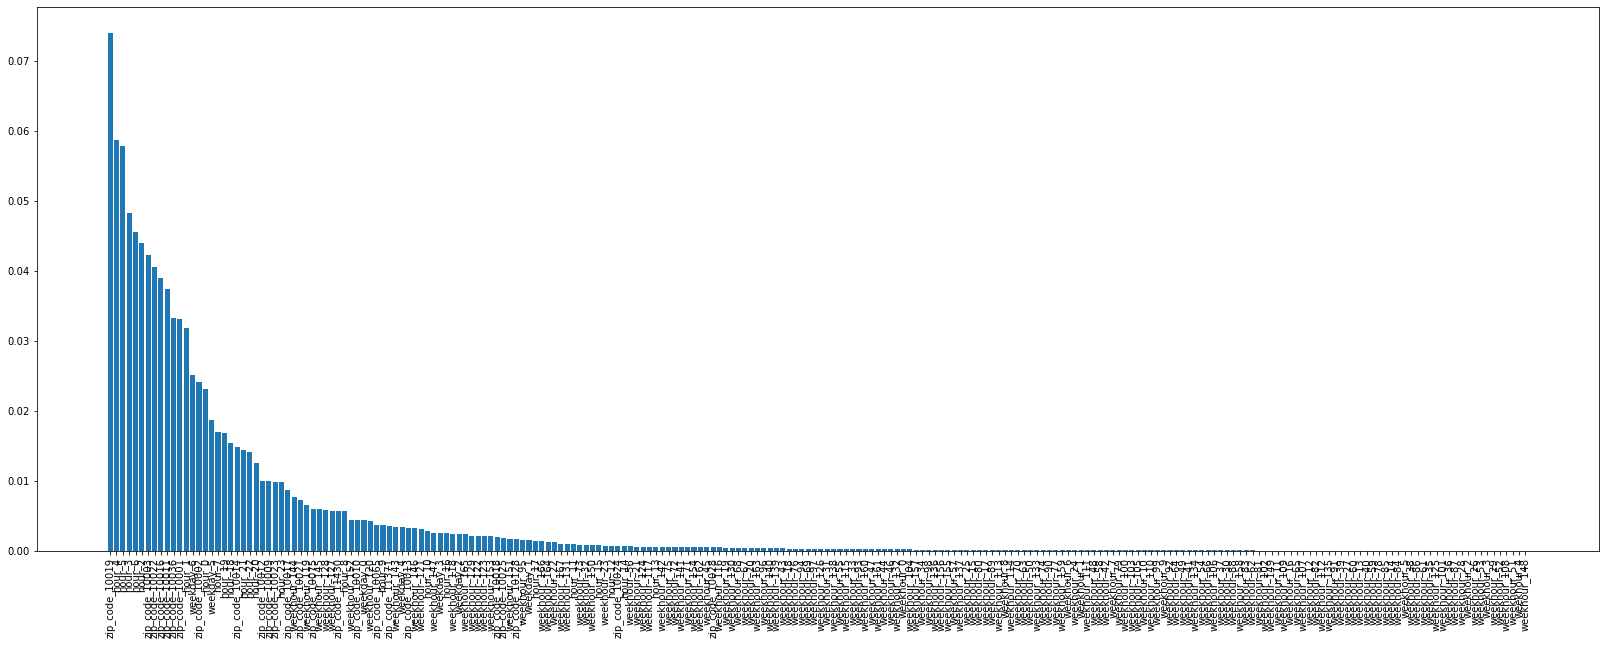

In [ ]:
fi = pd.concat([pd.DataFrame({"variables" : x_train.columns}), pd.DataFrame({'Feature Importances' : dt.feature_importances_})], axis=1).sort_values(by='Feature Importances', ascending = False)

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(28, 10))
plt.xticks(rotation=90)
plt.bar(fi.variables, fi['Feature Importances']);

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(dt, out_file=None, 
                feature_names = x_train.columns,
                class_names = 'cnt',
                max_depth = 3, # 표현하고 싶은 최대 depth
                precision = 3, # 소수점 표기 자릿수
                filled = True, # class별 color 채우기
                rounded=True, # 박스의 모양을 둥글게
               )

graph = graphviz.Source(dot_data)

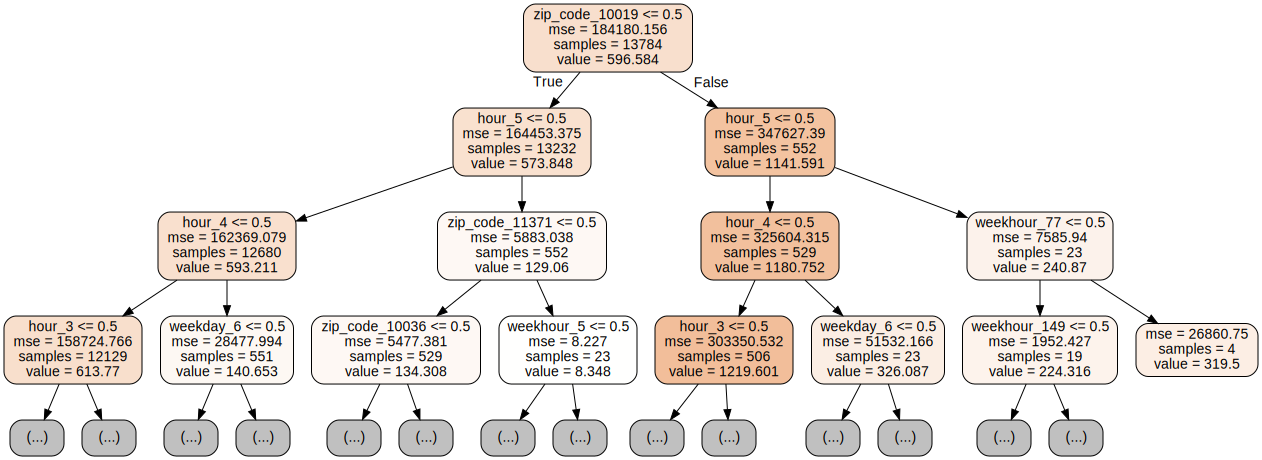

In [ ]:
graph

In [ ]:
with open('ohe.svg', 'w') as f:
    f.write(graph._repr_svg_())